# Task-05: Neural Style Transfer

## Installing dependencies
Here, the libraries needed for neural style transfer are installed:
- TensorFlow → deep learning backend
- Matplotlib → visualization
- NumPy → numerical operations
- Pillow → image handling


In [10]:
!pip install tensorflow matplotlib pillow numpy


## Importing libraries
Importing TensorFlow, NumPy, Matplotlib, and Pillow for model building and visualization.


In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
import os

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


## Loading Content and Style Images
We load a content image (e.g., a photo) and a style image (e.g., a painting).  
These will be combined using neural style transfer.


In [12]:
# Define content and style image paths
style_path = "/content/starry_night.jpg"
style_image = load_img(style_path)

# Load and preprocess images
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

content_image = load_img(content_path)
style_image = load_img(style_path)


## Using Pretrained VGG19
Neural style transfer uses a pretrained CNN (VGG19) to extract content and style features.


In [13]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
vgg.trainable = False


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Running Style Transfer
We use TensorFlow Hub’s pretrained style transfer model to apply the artistic style to the content image.


In [14]:
import tensorflow_hub as hub

hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]


## Saving Results
The stylized output is saved into the `results/samples/` folder.


In [15]:
os.makedirs("results/samples", exist_ok=True)

def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

output_img = tensor_to_image(stylized_image)
output_img.save("results/samples/style_transfer_output.png")


## Visualizing Results
Displaying the generated stylized image.


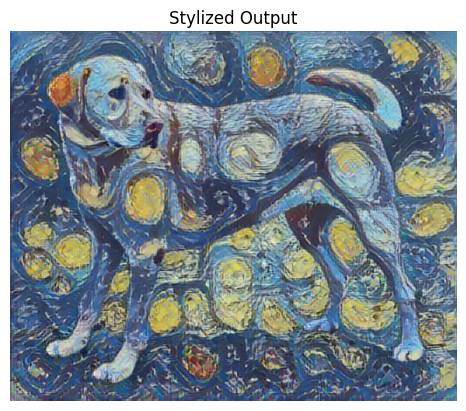

In [16]:
plt.imshow(output_img)
plt.title("Stylized Output")
plt.axis("off")
plt.show()
